# __SpringBoard Capstone Project 2: Human Activity Recognition__
## __Statistical Analysis__

__Written by: Sofy Weisenberg__<br>
__Date: 04/10/20__

__Importing the Data__<br>
Load the data from file and create a pandas dataframe. The raw data has been pre-processed and the feature engineering has already been performed to create a processed dataset. See the project report for more details on those steps. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
import time

# Use the current working directory path to navigate to the location of the processed data
cwd_path = os.getcwd()
data_path = os.path.join(cwd_path, '..', 'data', 'processed')

# Throw an assert error if the path does not exist
assert os.path.exists(data_path)

In [2]:
# Read the fully processed dataframe from file (created in Exploratory Data Analysis notebook)
full_data_df = pd.read_csv(os.path.join(data_path,'full_data_df.csv'))

__Initial Exploration__<br>
Now that the data has been loaded, the dataframe can be examined to gain a clearer picture of the data structure and features.

In [3]:
full_data_df.info()

# Throw an assert error if there are any missing values in the dataset
assert (full_data_df.isnull().sum().sum() == 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [4]:
# Display a few rows of the data
full_data_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


It can be seen that there are a total of 10299 rows and 563 columns, with no missing values. The feature data is all data type float64, and the last 2 columns are the subject number (int64) and the activity class (object).

In [5]:
full_data_df.groupby('Activity').count().subject

Activity
LAYING                1944
SITTING               1777
STANDING              1906
WALKING               1722
WALKING_DOWNSTAIRS    1406
WALKING_UPSTAIRS      1544
Name: subject, dtype: int64

The various activity classes are approximately evenly distributed since each subject performed each of the six activities. This means that for classification modeling, this is a balanced (rather than an imbalanced) dataset.

Next, it would be helpful to see a summary of the descriptive statistics for the data. This is done using the .describe() method.

In [6]:
full_data_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


__Visualizing Distributions__<br>
For statistical analysis purposes and in order to visualize some of the distributions of the different classes and subjects, each activity for a given subject will be summarized (time, mean, median, std, max, min) across the full activity time window for all features. Each of these summary statistics will be calculated in a new dataframe "separated_df_X".

In [7]:
separated_df_times = full_data_df.groupby(['Activity','subject']).count() * 2.56/2
separated_df_means = full_data_df.groupby(['Activity','subject']).mean()
separated_df_medians = full_data_df.groupby(['Activity','subject']).median()
separated_df_stds = full_data_df.groupby(['Activity','subject']).std()
separated_df_maxs = full_data_df.groupby(['Activity','subject']).max()
separated_df_mins = full_data_df.groupby(['Activity','subject']).min()

In statistically trying to distinguish the classes, it may be useful to compare the distributions of one or more variables across each of the various activities. For example, it is likely that the std dev of signals from the active classes will be generally higher than those of the passive classes.

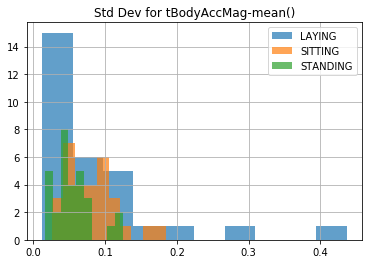

In [8]:
separated_df_stds.loc['LAYING']['tBodyAccMag-mean()'].hist(label='LAYING', alpha=0.7)
separated_df_stds.loc['SITTING']['tBodyAccMag-mean()'].hist(label='SITTING', alpha=0.7)
separated_df_stds.loc['STANDING']['tBodyAccMag-mean()'].hist(label='STANDING', alpha=0.7)
plt.title('Std Dev for tBodyAccMag-mean()')
plt.legend()
plt.show()

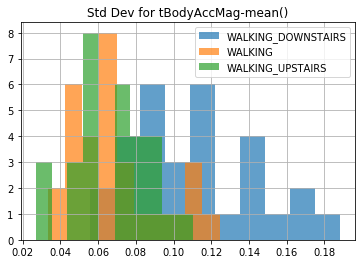

In [9]:
separated_df_stds.loc['WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'].hist(label='WALKING_DOWNSTAIRS', alpha=0.7)
separated_df_stds.loc['WALKING']['tBodyAccMag-mean()'].hist(label='WALKING', alpha=0.7)
separated_df_stds.loc['WALKING_UPSTAIRS']['tBodyAccMag-mean()'].hist(label='WALKING_UPSTAIRS', alpha=0.7)
plt.title('Std Dev for tBodyAccMag-mean()')
plt.legend()
plt.show()

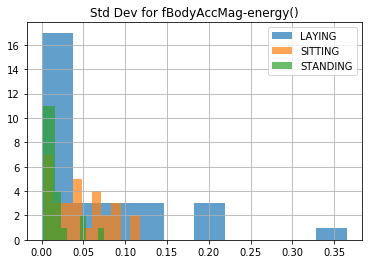

In [10]:
separated_df_stds.loc['LAYING']['fBodyAccMag-energy()'].hist(label='LAYING', alpha=0.7)
separated_df_stds.loc['SITTING']['fBodyAccMag-energy()'].hist(label='SITTING', alpha=0.7)
separated_df_stds.loc['STANDING']['fBodyAccMag-energy()'].hist(label='STANDING', alpha=0.7)
plt.title('Std Dev for fBodyAccMag-energy()')
plt.legend()
plt.show()

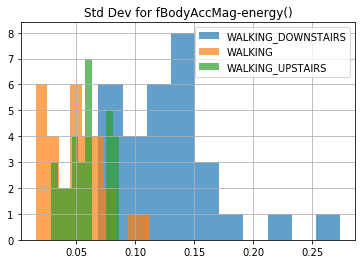

In [11]:
separated_df_stds.loc['WALKING_DOWNSTAIRS']['fBodyAccMag-energy()'].hist(label='WALKING_DOWNSTAIRS', alpha=0.7)
separated_df_stds.loc['WALKING']['fBodyAccMag-energy()'].hist(label='WALKING', alpha=0.7)
separated_df_stds.loc['WALKING_UPSTAIRS']['fBodyAccMag-energy()'].hist(label='WALKING_UPSTAIRS', alpha=0.7)
plt.title('Std Dev for fBodyAccMag-energy()')
plt.legend()
plt.show()

Additionally, it was observed in the Exporatory Data Analysis (see notebook in this folder), that the active and passive classes were more distinguishable as "superclusters" containing the individual activity class clusters. This means that additional statistical analysis can be done by assigning a new super-class label to each observation. This label will be in a new column "superClass" and will either be 0 for passive or 1 for active.

In [12]:
# Creating a new "superClass" label column; can either be 0 for passive or 1 for active 
full_data_df_with_superclass = full_data_df.copy()
full_data_df_with_superclass['superClass'] = ((full_data_df_with_superclass['Activity'] == 'WALKING') 
                                            | (full_data_df_with_superclass['Activity'] == 'WALKING_UPSTAIRS')
                                            | (full_data_df_with_superclass['Activity'] == 'WALKING_DOWNSTAIRS')) * 1

# Save this new dataframe to .csv for later reference
data_path = os.path.join(cwd_path, '..', 'data', 'processed')
full_data_df_with_superclass.to_csv(os.path.join(data_path,'full_data_df_with_superclass.csv'), index = False)

Again, each of the summary statistics will be calculated in a new dataframe "separated_df_X" -- this time separated by superClass.

In [13]:
# Calculate summary statistics based on superClass groupings
superClass_df_times = full_data_df_with_superclass.groupby(['superClass','subject']).count() * 2.56/2
superClass_df_means = full_data_df_with_superclass.groupby(['superClass','subject']).mean()
superClass_df_medians = full_data_df_with_superclass.groupby(['superClass','subject']).median()
superClass_df_stds = full_data_df_with_superclass.groupby(['superClass','subject']).std()
superClass_df_maxs = full_data_df_with_superclass.groupby(['superClass','subject']).max()
superClass_df_mins = full_data_df_with_superclass.groupby(['superClass','subject']).min()

And histograms of the standard deviation for 2 variables of interest may be plotted to compare by the superClass distinction. Here the differences are quite apparent.

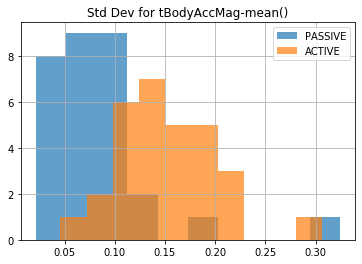

In [14]:
superClass_df_stds.loc[0]['tBodyAccMag-mean()'].hist(label='PASSIVE', alpha=0.7)
superClass_df_stds.loc[1]['tBodyAccMag-mean()'].hist(label='ACTIVE', alpha=0.7)
plt.title('Std Dev for tBodyAccMag-mean()')
plt.legend()
plt.show()

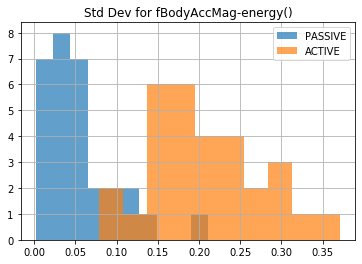

In [15]:
superClass_df_stds.loc[0]['fBodyAccMag-energy()'].hist(label='PASSIVE', alpha=0.7)
superClass_df_stds.loc[1]['fBodyAccMag-energy()'].hist(label='ACTIVE', alpha=0.7)
plt.title('Std Dev for fBodyAccMag-energy()')
plt.legend()
plt.show()

In [43]:
# Create a function to plot x, y, z total acceleration for a given subject and activity

#def plot_acceleration(ax, subject, activity):
def plot_feature(ax, feature, subject, activity):
    # filter dataframe by (subject, activity)
    df_by_sub_act = full_data_df[(full_data_df.subject == subject) & (full_data_df.Activity == activity)]
    
    # create x-axis array of 2.5 second windows w/50% overlap, based on (subject, activity) specific number of data points
    x_values = np.arange(0, len(df_by_sub_act.index)*2.56/2 ,2.56/2)
    
    # get the mean accelaration data
    x_acc = df_by_sub_act[feature]

    # plot and add axis labels, and title
    ax.plot(x_values, x_acc, label = activity)
    ax.set_ylabel(feature)
    ax.set_xlabel('Time [s]')
    ax.set_title(f'Subject {subject}')

In [44]:
# Create subplots for the first n subjects for each of the 6 activities
def plot_superClass_feature(feature, subject):

    fig1, ax1 = plt.subplots()
    plot_feature(ax1, feature, subject, 'LAYING')
    plot_feature(ax1, feature, subject, 'SITTING')
    plot_feature(ax1, feature, subject, 'STANDING')
    ax1.legend(loc = 'upper right')

    fig2, ax2 = plt.subplots()
    plot_feature(ax2, feature, subject, 'WALKING')
    plot_feature(ax2, feature, subject, 'WALKING_UPSTAIRS')
    plot_feature(ax2, feature, subject, 'WALKING_DOWNSTAIRS')
    ax2.legend(loc = 'upper right')

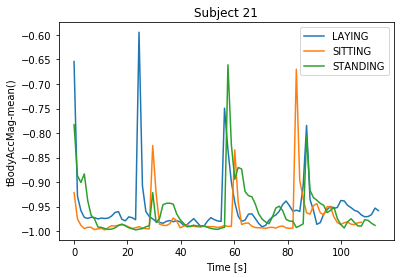

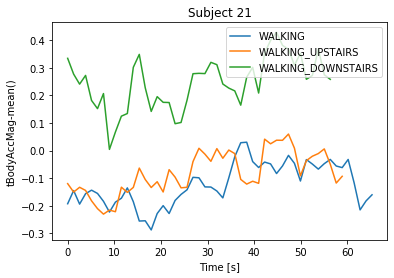

In [45]:
import random

#plot passive vs. active activities for a random subject
feature = 'tBodyAccMag-mean()'
subject = random.randrange(30)
plot_superClass_feature(feature, subject)

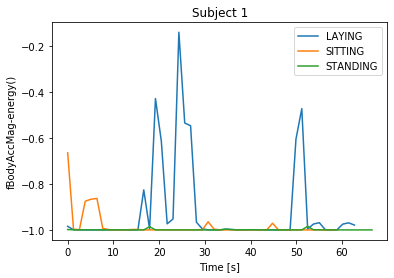

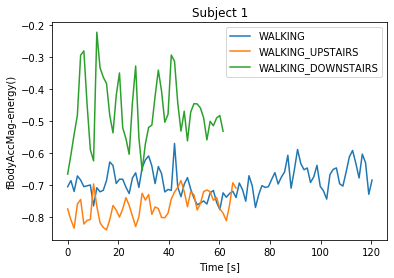

In [46]:
feature = 'fBodyAccMag-energy()'
subject = random.randrange(30)
plot_superClass_feature(feature, subject)

__Bootstrap Hypothesis Testing__<br>

One hypothesis worth testing is that Activity or superClass distinctions can be made based on the distribution of one or more of their single feature's summary statistics, across a subject sample of 30 participants.

For example, one hypothesis: passive and active classes have statistically significantly different mean std. dev for the tBodyAccMag-mean() feature. The histogram points to the possibility that this hypothesis is true, but a hypothesis test would be required to prove it with statistical significance.

Since the distributions of std. dev. for this feature do not appear to be normal for either superClass, a bootstrap resampling of these distributions could provide an easy method to test the difference of means.